# Created LeNeT-5 Architecture based on Mnist digit grayscale dataset.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain =  xtrain/255.0
xtest = xtest/255.0 

In [ ]:
#create LeNet-5 Architecture
model = Sequential()

model.add(Conv2D(6, kernel_size=(5,5), padding="valid", activation="tanh", input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(16, kernel_size=(5,5), padding="valid", activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(120, activation="tanh"))
model.add(Dense(84, activation="tanh"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [ ]:
history = model.fit(xtrain,ytrain, epochs=5, validation_data=(xtest,ytest), batch_size=100)

Epoch 1/5
600/600 [==============================] - 19s 11ms/step - loss: 0.3230 - accuracy: 0.9068 - val_loss: 0.1398 - val_accuracy: 0.9586
Epoch 2/5
600/600 [==============================] - 5s 9ms/step - loss: 0.1202 - accuracy: 0.9634 - val_loss: 0.0921 - val_accuracy: 0.9723
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0805 - accuracy: 0.9755 - val_loss: 0.0768 - val_accuracy: 0.9759
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.0612 - val_accuracy: 0.9811
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0706 - val_accuracy: 0.9769


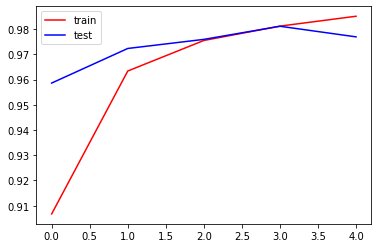

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="test")
plt.legend()

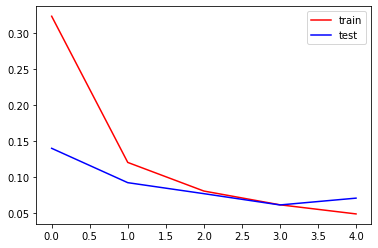

In [ ]:
 
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="test")
plt.legend()

In [ ]:
import cv2

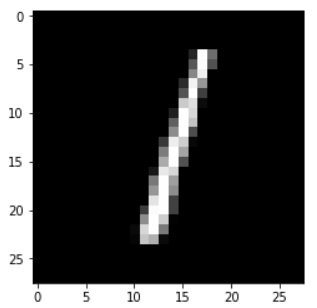

In [ ]:
from PIL import Image
img_rgb = Image.open('/content/one.png')
img_rgb

In [ ]:
img_gray = img_rgb.convert('L')

In [ ]:
from numpy import asarray
import numpy as np

In [ ]:
img_gray = asarray(img_gray)

In [ ]:
img_gray.shape

(308, 317)

In [ ]:
img_gray = cv2.resize(img_gray,(28,28))

In [ ]:
img_gray.shape

(28, 28)

In [ ]:
img_gray = img_gray.reshape(1,28,28,1)

In [ ]:
img_gray.shape

(1, 28, 28, 1)

In [ ]:
prediction = model.predict(img_gray) 
prediction_max = np.argmax(prediction) 

1/1 [==============================] - 0s 22ms/step


In [ ]:
prediction_max

1

The accuracy of these model is 97.69%,which can predict the digit accurately.